# TSF GRIP MAY 2021

#### TASK-5 EXPLORARTORY DATA ANALYSIS -(SPORTS)

As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.

                                    **Data Analyzation & Data Visulaization**     

# Import libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Successfully Imported the Libraries")

Successfully Imported the Libraries


# Importing The First  DATASET

In [2]:
matches=pd.read_csv("matches.csv")



In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


                                               Let's Analyzing the Dataset

# Viewing for shape of the dataset as (columns and rows)

In [5]:
matches.shape

(756, 18)

#### so we have 756 (Rows) & 18 (columns)

In [7]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# FOR STATISTICAL FORMULATION

In [5]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


# Checking null values

In [36]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

#### As we can see we have 7 null values in column (city) and 4 null values in each column (winner,  player of match), Now let's resolve this problem first

In [8]:
matches.drop(matches.columns[[15,16,17]], axis = 1, inplace = True)

In [9]:
matches[matches.city.isnull()][['city','date']]

,city,date
461,NaN,2014-04-19
462,NaN,2014-04-19
466,NaN,2014-04-23
468,NaN,2014-04-25
469,NaN,2014-04-25
474,NaN,2014-04-28
476,NaN,2014-04-30


#### As we can see these dates belong to the matches where the city column values are missing. So what actually it is by researching on the web
#### I come to know in this season(2014) particularly match were held in Dubai.So we gonna fill that null values in city with Dubai.

In [10]:
 matches['city'] = matches['city'].fillna("Dubai")

In [38]:
matches[matches.winner.isnull()][['result','winner','player_of_match']]

,result,winner,player_of_match
300,no result,NaN,NaN
545,no result,NaN,NaN
570,no result,NaN,NaN
744,no result,NaN,NaN


#### As we can see that there is null values in (winner & player of match) and there is no result in the result column.This means that there is no match result,then how can someone become winner and player of match , that's the reason it is justified and need not to remove this.

                                           ^^^^^^^^^^^^^^^^^^^^

# Now viewing the another dataset

In [39]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
deliveries.shape

(179078, 21)

In [14]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

#### As after seeing the information of deliveries data , we can see the last three columns of the data has alot of missing values.

** player_dismissed**
#### Aplayer is dismissed when he is out and there is so much missing values which indicates that because  no player would have been out at that time

** dismissal_kind**
#### If there is no batsman out in any single deliverie then what will be his dismissal_kind

** fielder**
#### Now,the same things stand for fielder. A fielder may not be involved in each dismissal so that columns contains missing values due to that. A batsman can also be dismissed due to (hitwicket and bowled).

In [15]:
teams = matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

We can see after doing this. Rising Pune Supergiant is repeated twice. let's resolve this

In [16]:
matches['winner'].replace(to_replace= "Rising Pune Supergiant",value="Rising Pune Supergiants",inplace=True)

In [17]:
teams=matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

Now let's see how many teams were there in the IPL

In [18]:
len(teams)

14

                                                       Data Visualization

# Most wickets taking bowler

<AxesSubplot:title={'center':'most wicket taking bowler'}, xlabel='bowler', ylabel='no of wickets'>

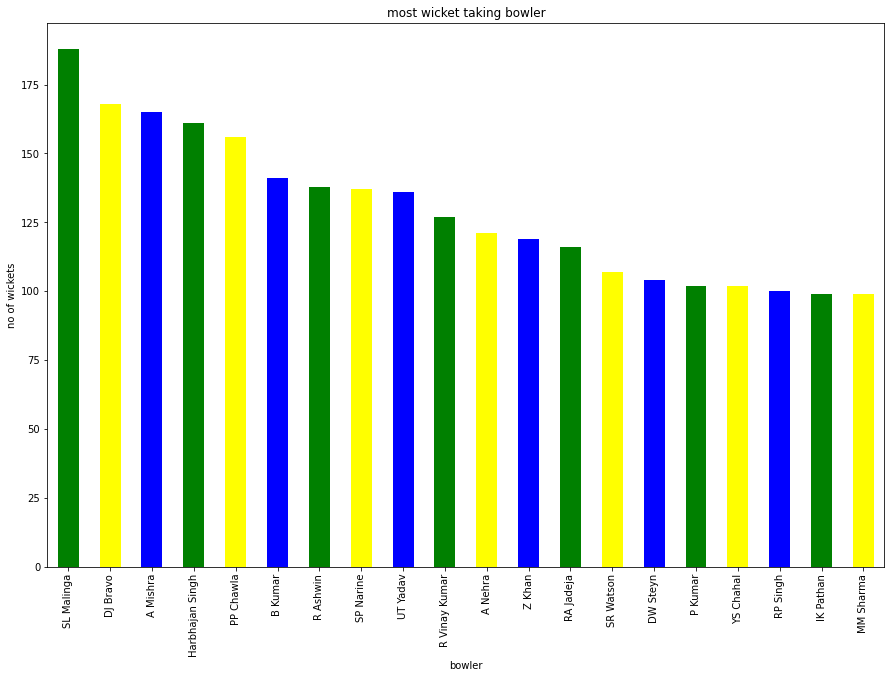

In [40]:
plt.figure(figsize=[15,10])
plt.title('most wicket taking bowler')
plt.ylabel('no of wickets')
deliveries.groupby('bowler').player_dismissed.count().sort_values(ascending=False)[:20].plot(kind='bar',color=['green','yellow','blue'])

** Most of the wickets has been taken by SL Malinga**

# Most Runs Scored by Batsman In All  the Season

<AxesSubplot:title={'center':'most runs by batsman'}, xlabel='batsman', ylabel='no of runs'>

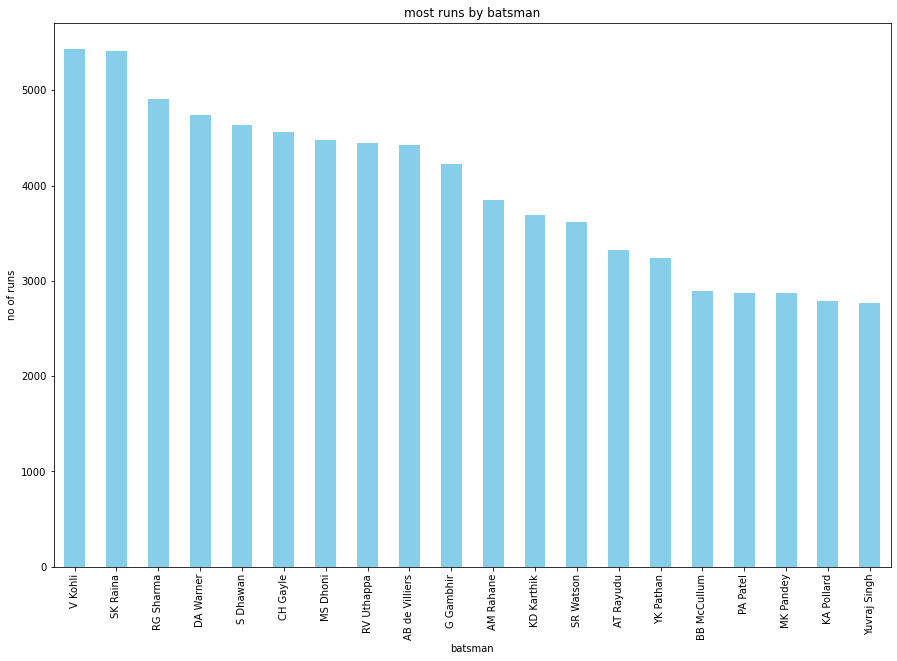

In [57]:
plt.figure(figsize=[15,10])
plt.title('most runs by batsman')
plt.ylabel('no of runs')
deliveries.groupby('batsman').batsman_runs.sum().sort_values(ascending=False)[:20].plot(kind='bar',color=['skyblue'])

** Virat Kohli had the most runs of the entire season**

# Top  best scores of  Batsman 

In [42]:
score=deliveries.groupby(['match_id','batsman','batting_team','bowling_team'])['batsman_runs'].sum().reset_index()
score.sort_values('batsman_runs',ascending=False)[:10]

,match_id,batsman,batting_team,bowling_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,Pune Warriors,175
900,60,BB McCullum,Kolkata Knight Riders,Royal Challengers Bangalore,158
8426,562,AB de Villiers,Royal Challengers Bangalore,Mumbai Indians,133
10149,7935,RR Pant,Delhi Daredevils,Sunrisers Hyderabad,130
9257,620,AB de Villiers,Royal Challengers Bangalore,Gujarat Lions,129
5585,372,CH Gayle,Royal Challengers Bangalore,Delhi Daredevils,128
3135,206,M Vijay,Chennai Super Kings,Rajasthan Royals,127
529,36,DA Warner,Sunrisers Hyderabad,Kolkata Knight Riders,126
7752,516,V Sehwag,Kings XI Punjab,Chennai Super Kings,122
10417,7953,SR Watson,Chennai Super Kings,Sunrisers Hyderabad,121


# Which Teams have won Maximum no of matches

<AxesSubplot:title={'center':'Total No Of Matches Won'}, ylabel='no of matches won'>

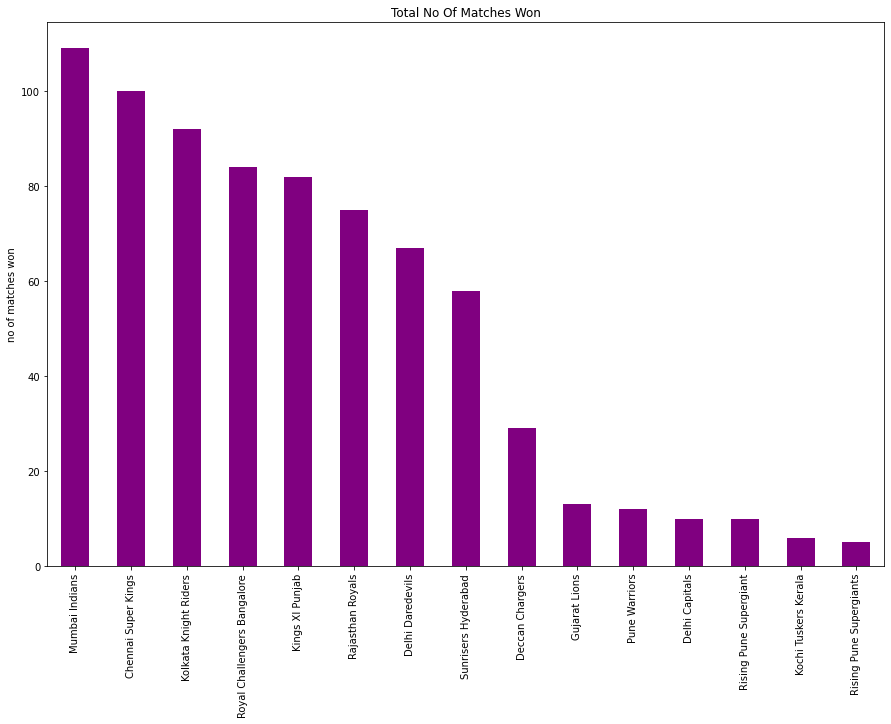

In [44]:
plt.figure(figsize=[15,10])
plt.title('Total No Of Matches Won')
plt.ylabel('no of matches won')
matches.winner.value_counts().plot(kind='bar',color=['purple'])

** Mumbai Indians won the most no of matches**

# Impact of Toss winning

<BarContainer object of 2 artists>

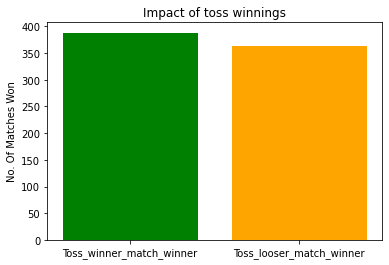

In [20]:
plt.title('Impact of toss winnings')
plt.ylabel('No. Of Matches Won')
result = ['Toss_winner_match_winner', 'Toss_looser_match_winner']
count = [matches[matches.toss_winner == matches.winner].winner.count(), matches[matches.toss_winner != matches.winner].winner.count()]
plt.bar(result, count, color=['green','orange'])

** The team who won the toss have higher chance of winning the match**

# Impact of toss decision leads to winning

<BarContainer object of 2 artists>

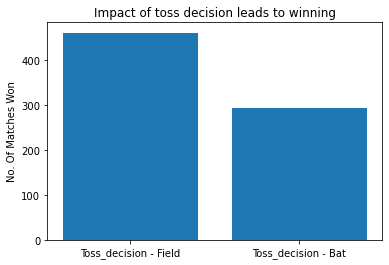

In [47]:
plt.title('Impact of toss decision leads to winning')
plt.ylabel('No. Of Matches Won')
result1 = ['Toss_decision - Field', 'Toss_decision - Bat']
count1 = [matches[matches.toss_decision == 'field'].winner.count(), matches[matches.toss_decision == 'bat'].winner.count()]
plt.bar(result1, count1)

** Most of the captains like to choose field after winning the toss**

# Match hosting cities

<AxesSubplot:title={'center':'Match hosting Cities'}, ylabel='No. Of Matches'>

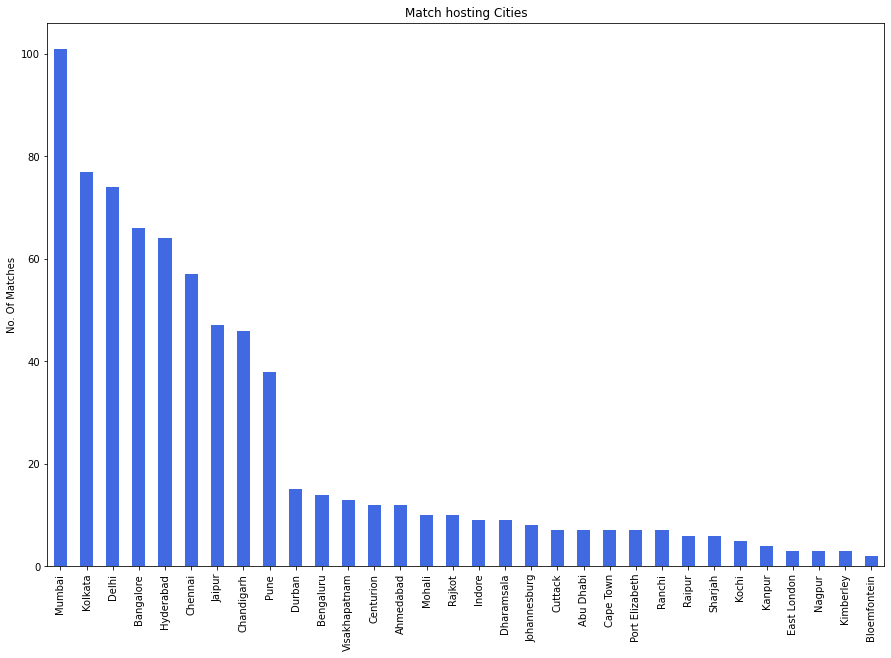

In [48]:
plt.figure(figsize=[15,10])
plt.title('Match hosting Cities')
plt.ylabel('No. Of Matches')
matches.city.value_counts().plot(kind='bar', color='royalblue')

#  Player Of Match

<AxesSubplot:title={'center':'Player Of the Match'}>

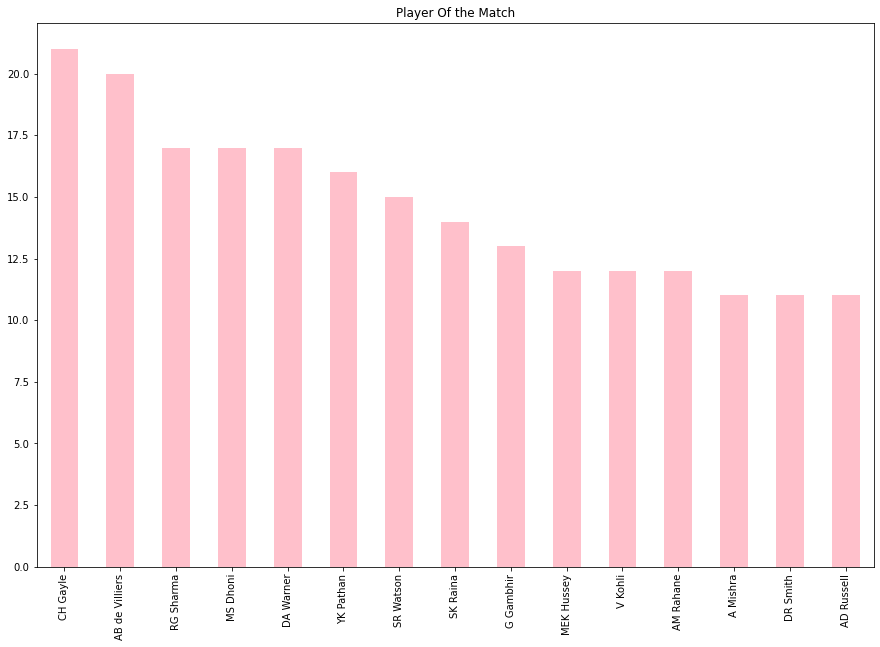

In [50]:
plt.figure(figsize=[15,10])
plt.title('Player Of the Match')
matches.player_of_match.value_counts()[:15].plot(kind='bar', color='pink')

# Most No. Of four hits by batsman

<AxesSubplot:title={'center':'Numbers Of fours Hit'}, xlabel='batsman,total_runs'>

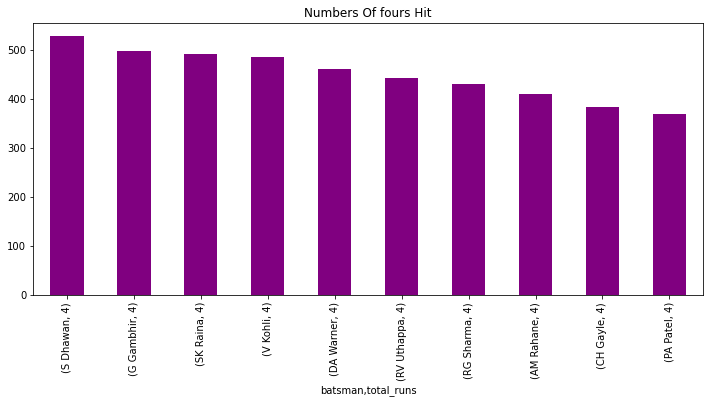

In [54]:
plt.figure(figsize=[12,5])
plt.title('Numbers Of fours Hit')
fours = deliveries[deliveries.total_runs == 4].groupby('batsman')
fours.total_runs.value_counts().sort_values(ascending=False)[:10].plot(kind="bar", color="purple")

# No of sixes hits by the batsman

<AxesSubplot:title={'center':'Numbers Of Sixes Hit'}, xlabel='batsman,total_runs'>

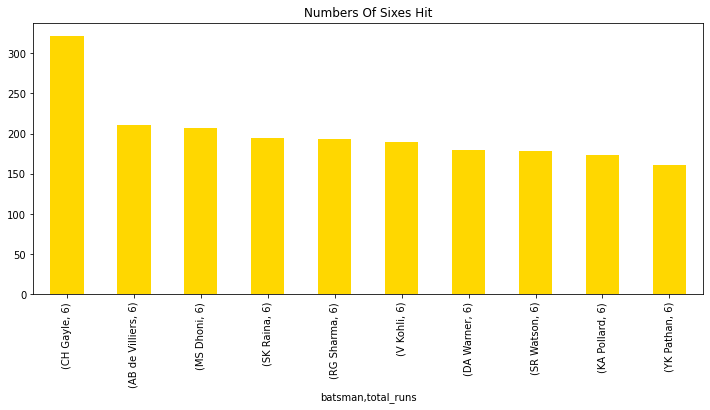

In [55]:
plt.figure(figsize=[12,5])
plt.title('Numbers Of Sixes Hit')
sixes = deliveries[deliveries.total_runs == 6].groupby('batsman')
sixes.total_runs.value_counts().sort_values(ascending=False)[:10].plot(kind="bar", color="gold")

# conclusion-

# These teams a company should endorse for its products or Most successful Teams:-



Top 3:
    
1- Mumbai Indians

2-Chennai Super Kings

3-Kolkata Knight Riders

# These are the players a company should endorse for its products

Virat Kohli

chris Gayle

Sk Raina

RG Sharma

S Dhawan

# Factors of loosing or win the teams

1.The teams who wons the toss has higher chance of winning the match .

2.Mostof the teams who won the toss they choose to field first.

# Top Performance of Players based on scores

Virat Kohli 

Chris gayle

Sk Raina

